In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RNG(n,a,m,seed = 0):
    n_i = np.full((n),0.)
    n_i[0] = seed
    for i in range(1,len(n_i)):
        n_i[i] = (a*n_i[i-1]) % m
    return n_i

In [13]:
def find_period(arr):
    n = len(arr)
    for period in range(1, n // 2 + 1):
        is_periodic = True
        for i in range(period, n):
            if arr[i] != arr[i - period]:
                is_periodic = False
                break
        if is_periodic:
            return period
    return n

In [3]:
#a = 2
RNG(10,2,2**3,1.0)

array([1., 2., 4., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
#a = 4
RNG(10,4,2**3,1)

array([1., 4., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
# For even number it is predictable.

In [6]:
#a = 3
RNG(10,3,2**3,1)

array([1., 3., 1., 3., 1., 3., 1., 3., 1., 3.])

In [7]:
#a = 5
RNG(10,5,2**3,1)

array([1., 5., 1., 5., 1., 5., 1., 5., 1., 5.])

In [8]:
#a = 5
RNG(10,3,2**4,1)

array([ 1.,  3.,  9., 11.,  1.,  3.,  9., 11.,  1.,  3.])

In [9]:
#a = 5
RNG(10,3,2**5,1)

array([ 1.,  3.,  9., 27., 17., 19., 25., 11.,  1.,  3.])

In [14]:
def f(x):
    return 6*x*(1-x)

In [17]:
y = [f(x/1000) for x in range(1000)]

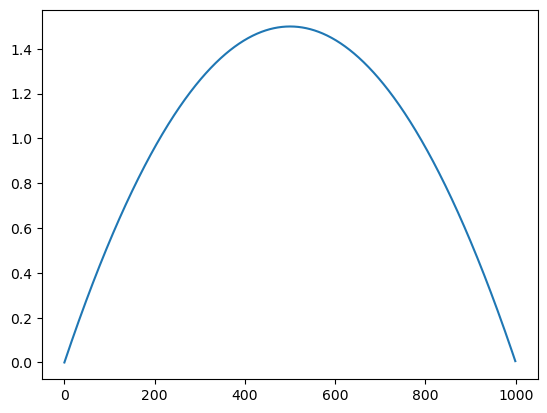

In [18]:
plt.plot(y)

In [22]:
import numpy as np

# Function to perform the Jacobi iteration
def jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.copy(x0)

    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            s = 0.0
            for j in range(n):
                if i != j:
                    s += A[i][j] * x[j]
            x_new[i] = (b[i] - s) / A[i][i]
        error = np.linalg.norm(x_new - x)
        x = np.copy(x_new)
        if error < tol:
            print(f"Jacobi converged in {k+1} iterations.")
            return x

    print("Jacobi did not converge in the specified number of iterations.")
    return x

# Define the coefficient matrix A and the right-hand side vector b
n=10
A = np.zeros((n,n),dtype=float)
b = np.zeros((n,1), dtype=float)

b[0] = 1.
b[n-1] = 1.
for i in range(n):
    A[i, i] = 2.0
    if i < (n - 1):
        A[i, i + 1] = -1.0
        A[i + 1, i] = -1.0

# Initial guess for the solution
x0 = np.zeros(len(b), dtype=float)

# Tolerance and maximum number of iterations
tolerance = 1e-6
max_iterations = 1000

# Solve the linear system using Jacobi
solution = jacobi(A, b, x0, tolerance, max_iterations)

# Print the solution
print("Solution:")
for i, x in enumerate(solution):
    print(f"x[{i}] = {x}")


Jacobi converged in 284 iterations.
Solution:
x[0] = 0.9999971708767869
x[1] = 0.999994570952311
x[2] = 0.9999924108569912
x[3] = 0.9999908655889036
x[4] = 0.9999900603364785
x[5] = 0.9999900603364785
x[6] = 0.9999908655889036
x[7] = 0.9999924108569912
x[8] = 0.999994570952311
x[9] = 0.9999971708767869
